In [13]:
import torch
from moving_mnist import MovingMNIST
from yasin_utils.image import plot_grid

In [14]:
dataset = MovingMNIST(
    train=True,
    data_root='/data',
    seq_len=20,
    num_digits=2,
    image_size=64,
    deterministic=True
)

In [15]:
sample = dataset[10]

In [16]:
sample.shape

(20, 64, 64, 1)

In [20]:
X, T = torch.from_numpy(sample[:10]), torch.from_numpy(sample[10:])

In [21]:
X.shape, T.shape

(torch.Size([10, 64, 64, 1]), torch.Size([10, 64, 64, 1]))

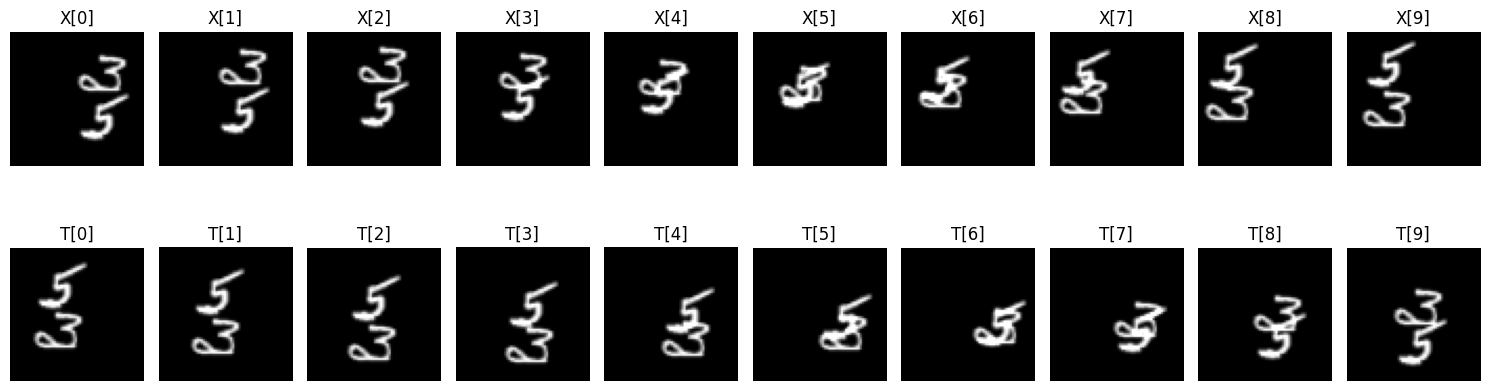

In [22]:
import matplotlib.pyplot as plt

# Plot X and T in a grid
fig, axes = plt.subplots(2, X.shape[0], figsize=(15, 5))

for i in range(X.shape[0]):
    axes[0, i].imshow(X[i], cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title(f'X[{i}]')

    axes[1, i].imshow(T[i], cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title(f'T[{i}]')

plt.tight_layout()
plt.show()

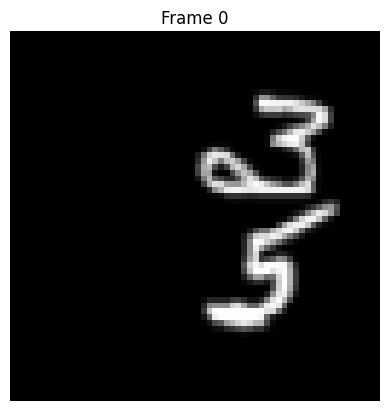

In [23]:
import torch
import matplotlib.animation as animation
from IPython.display import HTML

# Concatenate X and T along dimension 0
XT = torch.cat((X, T), dim=0)

fig, ax = plt.subplots()
ax.set_axis_off()

def update(frame):
    ax.imshow(XT[frame], cmap='gray')
    ax.set_title(f'Frame {frame}')

ani = animation.FuncAnimation(fig, update, frames=XT.shape[0], interval=50)
HTML(ani.to_jshtml())